# Amazon Reviews Dataset

## Imports

In [ ]:
import os
import pandas as pd
import polars as pl
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from pl_utils import pl_info
from pl_utils import dtype_info

## Load dataset

In [2]:
if not os.path.exists('/root/.cache/kagglehub/datasets/dongrelaxman/amazon-reviews-dataset/versions/1/Amazon_Reviews.csv'):
# Download latest version
    dataset_folder = kagglehub.dataset_download("dongrelaxman/amazon-reviews-dataset")
    print("Path to dataset files:", dataset_folder)
    if "Amazon_Reviews.csv" in os.listdir(dataset_folder):
        dataset_path = dataset_folder + "/Amazon_Reviews.csv"
else:
    dataset_path = '/root/.cache/kagglehub/datasets/dongrelaxman/amazon-reviews-dataset/versions/1/Amazon_Reviews.csv'

100%|██████████| 4.59M/4.59M [00:02<00:00, 2.30MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dongrelaxman/amazon-reviews-dataset/versions/1


In [3]:
df = pl.read_csv(dataset_path)

## EDA

In [4]:
df.sample(5)

Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
str,str,str,str,str,str,str,str,str
"""John""","""/users/65e6d06b9504e00012aab32…","""GB""","""3 reviews""","""2024-04-16T17:06:48.000Z""","""Rated 1 out of 5 stars""","""The customer service is appall…","""The customer service is appall…","""April 15, 2024"""
"""Jennifer Szeto""","""/users/604351e3e664b70019e4b07…","""AU""","""1 review""","""2021-03-06T09:57:01.000Z""","""Rated 1 out of 5 stars""","""Setup New account is impossibl…","""Some might said scams from sel…","""March 06, 2021"""
"""Nicole Monet""","""/users/5eab12730c79cd11d9c8ac4…","""US""","""5 reviews""","""2020-04-30T18:03:45.000Z""","""Rated 5 out of 5 stars""","""Great Site!""","""I highly recommend amazon to p…","""April 30, 2020"""
"""S R""","""/users/5f4fd5b9feddbc49a8e2211…","""US""","""1 review""","""2020-09-02T17:26:23.000Z""","""Rated 1 out of 5 stars""","""Amazon makes thousands of frau…","""Amazon makes thousands of frau…","""September 02, 2020"""
"""Steve Doubleday""","""/users/5b19674c4de5666d3444b46…","""GB""","""80 reviews""","""2023-10-30T18:48:16.000Z""","""Rated 1 out of 5 stars""","""Amazon get worse and worse and…","""Amazon get worse and worse and…","""October 30, 2023"""


In [5]:
df.describe()

statistic,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
str,str,str,str,str,str,str,str,str,str
"""count""","""21055""","""21055""","""21055""","""21055""","""21055""","""21055""","""21055""","""21055""","""21055"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null
"""min""","""""Kestutis Lazauskas""""","""/users/46d1ed15000064000100005…","""AD""","""1 review""","""2007-08-27T17:25:01.000Z""","""Rated 1 out of 5 stars""",""" Terrible experience today """,""" Amazon customer service has…","""April 01, 2012"""
"""25%""",null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null
"""max""","""👸🏼""","""/users/66e96137389eefc81dbb22a…","""ZM""","""99 reviews""","""2024-09-17T13:19:27.000Z""","""Rated 5 out of 5 stars""","""🤢🤢Burk""","""🤢🤢They all are just focus on m…","""September 30, 2023"""


In [6]:
raw_size = df.estimated_size()
raw_size

12820994

In [7]:
pl_info(df)

sys.version='3.12.11 (main, Sep  9 2025, 06:00:18) [GCC 14.2.0]'
pl.__version__='1.33.1'
_______________________
Polars DataFrame info — shape: (21055, 9)
Estimated memory usage: 12.2MB

Column               Dtype         Non-Null   Nulls  Unique
-----------------------------------------------------------
Reviewer Name        String           21055       0   18375
Profile Link         String           21055       0   21055
Country              String           21055       0     149
Review Count         String           21055       0     177
Review Date          String           21055       0   21054
Rating               String           21055       0       5
Review Title         String           21055       0   19277
Review Text          String           21055       0   20407
Date of Experience   String           21055       0    3660

dtypes:
  String: 9


## Processing

- snake case column names
    - using pipe
    - alt : use https://pyjanitor-devs.github.io/pyjanitor/api/polars/ import polars as pl ; import janitor.polars; df.clean_names(remove_special=True)

- clean Profile Link

In [8]:
with pl.Config(fmt_str_lengths=40):
    print(df.select(pl.col('Profile Link')).sample(3))

shape: (3, 1)
┌─────────────────────────────────┐
│ Profile Link                    │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ /users/5c1315768ff7d4dce6323587 │
│ /users/6318e4098563c1001242e5a1 │
│ /users/5efa5246c57978d5b2cf0a89 │
└─────────────────────────────────┘



- country : not worth converting to Categorical because (1) the dataset is small and (2) there are no joins planned on this column. Read more in the docs : https://docs.pola.rs/user-guide/expressions/categorical-data-and-enums/
- review  count : extract number as `pl.Int16` (regexp or splice | edit : there is no `str.splice`in polars so use `str.extract` with a regexp) 
- review date : cast to `pl.Datetime("us", "UTC")`
- rating : cast to `pl.UInt8`
- date of experience as `pl.Datetime`


In [9]:
dtype_info() # check to cast to smallest data type

| dtype  | min                        | max                        |
|--------|----------------------------|----------------------------|
| int8   | -128                       | 127                        |
| int16  | -32_768                    | 32_767                     |
| int32  | -2_147_483_648             | 2_147_483_647              |
| int64  | -9_223_372_036_854_775_808 | 9_223_372_036_854_775_807  |
| uint8  | 0                          | 255                        |
| uint16 | 0                          | 65_535                     |
| uint32 | 0                          | 4_294_967_295              |
| uint64 | 0                          | 18_446_744_073_709_551_615 |


In [10]:
clean_df = (
    df.select(
        pl.col(
            [
                "Reviewer Name",
                "Profile Link",
                "Country",
                "Review Count",
                "Review Date",
                "Rating",
                "Review Title",
                "Review Text",
                "Date of Experience",
            ]
        )
    )
    .pipe(
        lambda a_df: a_df.rename(
            {col: col.replace(" ", "_").lower() for col in a_df.columns}
        )
    )
    .select(
        pl.col('reviewer_name'),
        pl.col("profile_link").str.replace("/users/", "").alias("user_id"),
        pl.col('country'),
        pl.col("review_count").str.split(" ").list.get(0).cast(pl.Int16),
        pl.col("review_date").str.strptime(pl.Datetime("us", "UTC"), "%Y-%m-%dT%H:%M:%S%.fZ").alias("review_datetime_utc"),
        pl.col("rating").str.extract(r"(\d+)").cast(pl.UInt8),
        pl.col('review_title'),
        pl.col('review_text'),
        pl.col("date_of_experience").str.strip_chars().str.strptime(pl.Date, "%B %d, %Y", strict=False)
     )
)
clean_df

reviewer_name,user_id,country,review_count,review_datetime_utc,rating,review_title,review_text,date_of_experience
str,str,str,i16,"datetime[μs, UTC]",u8,str,str,date
"""Eugene ath""","""66e8185ff1598352d6b3701a""","""US""",1,2024-09-16 13:44:26 UTC,1,"""A Store That Doesn't Want to S…","""I registered on the website, t…",2024-09-16
"""Daniel ohalloran""","""5d75e460200c1f6a6373648c""","""GB""",9,2024-09-16 18:26:46 UTC,1,"""Had multiple orders one turned…","""Had multiple orders one turned…",2024-09-16
"""p fisher""","""546cfcf1000064000197b88f""","""GB""",90,2024-09-16 21:47:39 UTC,1,"""I informed these reprobates""","""I informed these reprobates th…",2024-09-16
"""Greg Dunn""","""62c35cdbacc0ea0012ccaffa""","""AU""",5,2024-09-17 07:15:49 UTC,1,"""Advertise one price then incre…","""I have bought from Amazon befo…",2024-09-17
"""Sheila Hannah""","""5ddbe429478d88251550610e""","""GB""",8,2024-09-16 18:37:17 UTC,1,"""If I could give a lower rate I…","""If I could give a lower rate I…",2024-09-16
…,…,…,…,…,…,…,…,…
"""Anders T""","""47bd4ffe0000640001001044""","""DK""",1,2009-03-22 13:14:12 UTC,5,"""Fast!!""","""I have had perfect order fulfi…",2009-03-22
"""David E""","""495bbbc0000064000100a972""","""US""",2,2008-12-31 18:57:31 UTC,5,"""Consistently Excellent""","""I have had perfect order fulfi…",2008-12-31
"""Joseph Harding""","""48cfacbf0000640001005d04""","""GB""",3,2008-09-16 13:05:05 UTC,3,"""Good prices but delivery can t…","""I always find myself going bac…",2008-09-16


In [11]:
clean_df.dtypes

[String,
 String,
 String,
 Int16,
 Datetime(time_unit='us', time_zone='UTC'),
 UInt8,
 String,
 String,
 Date]

In [12]:
clean_df.describe()

statistic,reviewer_name,user_id,country,review_count,review_datetime_utc,rating,review_title,review_text,date_of_experience
str,str,str,str,f64,str,f64,str,str,str
"""count""","""21055""","""21055""","""21055""",21055.0,"""21055""",21055.0,"""21055""","""21055""","""21055"""
"""null_count""","""0""","""0""","""0""",0.0,"""0""",0.0,"""0""","""0""","""0"""
"""mean""",null,null,null,8.48872,"""2020-11-23 16:26:51.289799+00:…",2.186654,null,null,"""2020-11-16 20:48:42.403229"""
"""std""",null,null,null,18.239247,null,1.676769,null,null,null
"""min""","""""Kestutis Lazauskas""""","""46d1ed150000640001000051""","""AD""",1.0,"""2007-08-27 17:25:01+00:00""",1.0,""" Terrible experience today """,""" Amazon customer service has…","""2007-08-27"""
"""25%""",null,null,null,1.0,"""2019-09-17 15:28:22+00:00""",1.0,null,null,"""2019-09-14"""
"""50%""",null,null,null,3.0,"""2021-07-26 04:51:41+00:00""",1.0,null,null,"""2021-07-23"""
"""75%""",null,null,null,8.0,"""2023-05-25 18:42:43+00:00""",4.0,null,null,"""2023-05-11"""
"""max""","""👸🏼""","""66e96137389eefc81dbb22ad""","""ZM""",633.0,"""2024-09-17 13:19:27+00:00""",5.0,"""🤢🤢Burk""","""🤢🤢They all are just focus on m…","""2024-09-17"""


In [13]:
print(f"Saved { (float(raw_size) - clean_df.estimated_size()) / float(raw_size):.1%} memory space")

Saved 10.2% memory space


## Data viz

In [14]:
clean_df.select(cs.numeric()).columns

['review_count', 'rating']

In [15]:
clean_df.select(pl.col("review_count")).describe()

statistic,review_count
str,f64
"""count""",21055.0
"""null_count""",0.0
"""mean""",8.48872
"""std""",18.239247
"""min""",1.0
"""25%""",1.0
"""50%""",3.0
"""75%""",8.0
"""max""",633.0


deciles_table = dv_df.review_count.quantile(np.arange(0.1, 1.0, 0.1))

font = {'weight' : 'semibold',
        'size'   : 6}
pltrc('font', **font)

f, axes = plt.subplots(9, figsize=(19, 11))

for dec, ax in zip(deciles_table.index, axes):
    computed_value = deciles_table[dec]
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    sns.boxplot(data=dv_df[dv_df["review_count"] < computed_value], x="review_count", ax=ax)


In [98]:
# some plots like pairplot expect a pandas datafram
dv_df = clean_df.to_pandas()

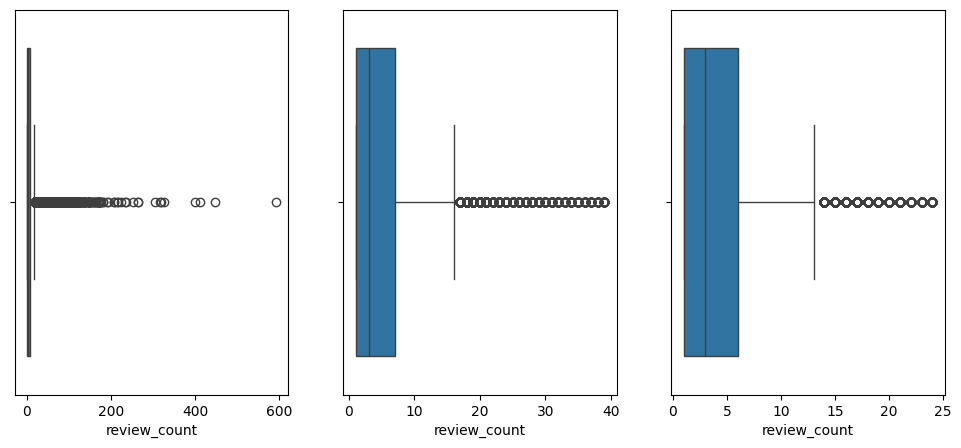

In [99]:
f, axs = plt.subplots(1, 3, figsize = (12, 5))

for val, ax in zip([dv_df.review_count.max(), 40, 25], axs):
    sns.boxplot(data=dv_df[dv_df.review_count < val], x="review_count", ax=ax)


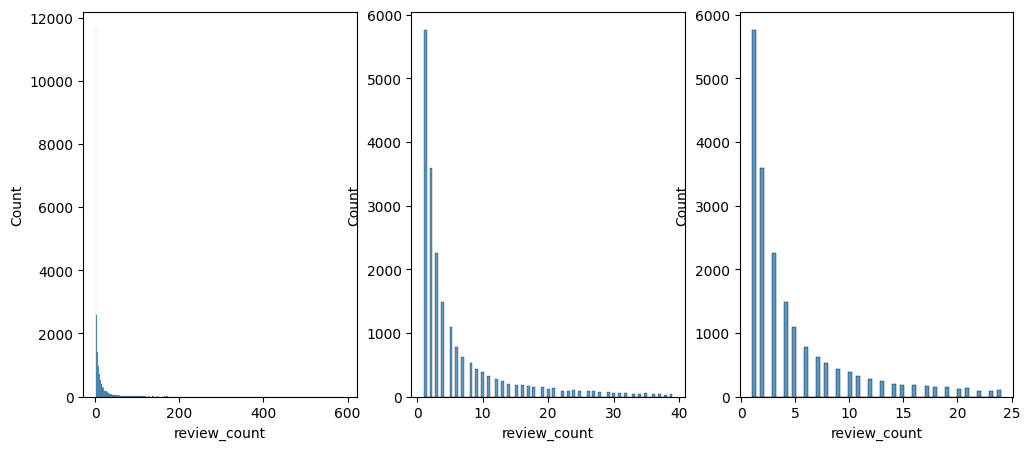

In [100]:
f, axs = plt.subplots(1, 3, figsize = (12, 5))

for val, ax in zip([dv_df.review_count.max(), 40, 25], axs):
    sns.histplot(data=dv_df[dv_df.review_count < val], x="review_count", ax=ax)

<Axes: xlabel='rating', ylabel='Count'>

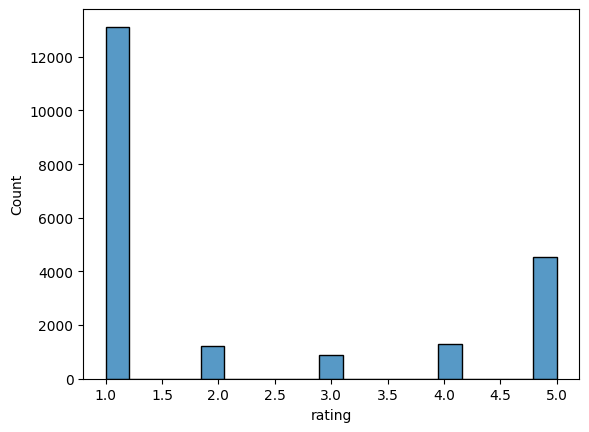

In [101]:
sns.histplot(data=dv_df, x="rating")

In [106]:
# create user profiles based on quartiles
def create_groups(df, colname, quantiles=4, labels=["occasional", "regular", "heavy_users"], rename=True, new_colname=["review_count", "profile"]):
    """creates 3 groups based on quartiles"""
    df_with_groups = pd.concat([
        df.review_count,
        pd.qcut(df[colname], quantiles, labels=labels, duplicates='drop')
        ], axis=1
    ).set_axis([colname, "group"], axis="columns")
    print(f"{df_with_groups.shape=}")
    return df_with_groups

create_groups(dv_df, "review_count")

df_with_groups.shape=(21055, 2)


,review_count,group
0,1,occasional
1,9,heavy_users
2,90,heavy_users
3,5,regular
4,8,regular
...,...,...
21050,1,occasional
21051,2,occasional
21052,3,occasional
21053,82,heavy_users


In [107]:
# check metrics for each group
def compute_created_groups_metrics(df):
    return(
        df.groupby("group", observed=True).agg(['min', 'max', 'count'])
        .set_axis(["min_value", "max_value", "count_value"], axis="columns")
        .assign(pct= lambda _df : _df.count_value / _df.count_value.sum() )
    )

In [108]:
dv_df = create_groups(dv_df, "review_count")
compute_created_groups_metrics(dv_df)

df_with_groups.shape=(21055, 2)


,min_value,max_value,count_value,pct
group,,,,
occasional,1,3,11609,0.551365
regular,4,8,4515,0.214438
heavy_users,9,633,4931,0.234196


In [109]:
reduced_dv_df = dv_df[dv_df.review_count < 25]
reduced_dv_df = create_groups(reduced_dv_df, "review_count")
compute_created_groups_metrics(reduced_dv_df)

df_with_groups.shape=(19383, 2)


,min_value,max_value,count_value,pct
group,,,,
occasional,1,3,11609,0.598927
regular,4,6,3370,0.173864
heavy_users,7,24,4404,0.227209
